In [1]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [2]:
df = pd.read_csv (r'winemag-data-130k-v2.csv')
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [3]:
import re
mylist = df['title'] # init the list
df["year"] = np.ones(df['title'].shape)
for i, l in enumerate(mylist):
    match = re.match(r'.*([1-2][0-9]{3})', l)
    if match is not None:
        # Then it found a match!
        df.at[i,'year'] = int(match.group(1))

In [4]:
y = df['points']
x = df.drop('points',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
print(x_train.shape, y_train.shape)

(103976, 14) (103976,)


In [6]:
print(x_test.shape,y_test.shape)

(25995, 14) (25995,)


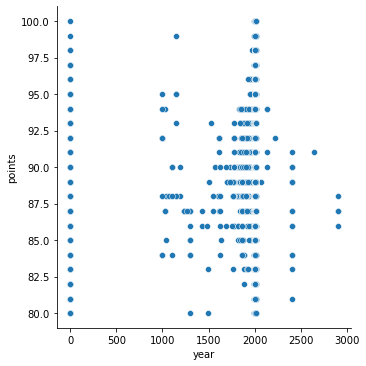

In [7]:
sns.relplot(
    data=df,
    x="year", y="points",
)

In [8]:
df['year']

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: year, Length: 129971, dtype: float64

In [9]:
df['year'].loc[lambda s: s < 1800 ]

63           1.0
69           1.0
213       1105.0
237          1.0
315          1.0
           ...  
129710       1.0
129719       1.0
129743       1.0
129869       1.0
129929       1.0
Name: year, Length: 4706, dtype: float64

In [10]:
new_df = df.drop(np.append(df['year'].loc[lambda s: s < 1980 ].index.values,df['year'].loc[lambda s: s > 2022 ].index.values))

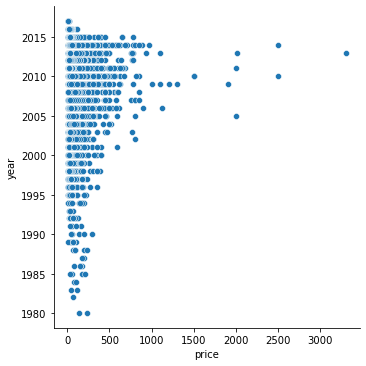

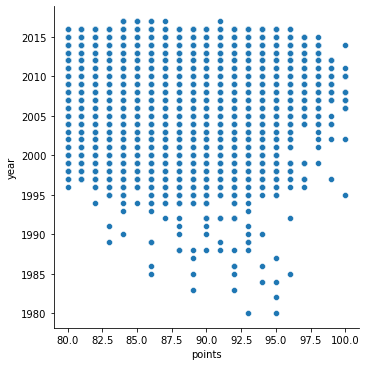

In [11]:
sns.relplot(
    data=new_df,
    x="price", y="year",
)
sns.relplot(
    data=new_df,
    x="points", y="year",
)

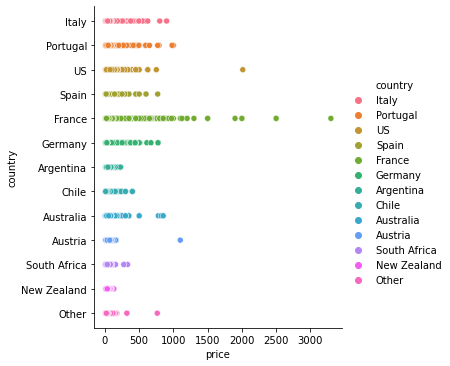

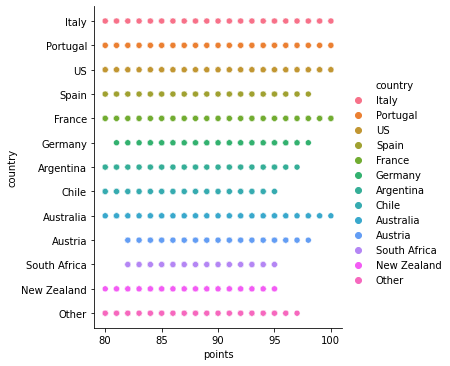

In [12]:

p_df = df.copy()
province_count = df['country'].value_counts()
for index, value in province_count.items():
    if value/df['country'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.relplot(
    data=p_df,
    hue="country",x="price", y="country",
)
sns.relplot(
    data=p_df,
    hue="country",x="points", y="country",
)

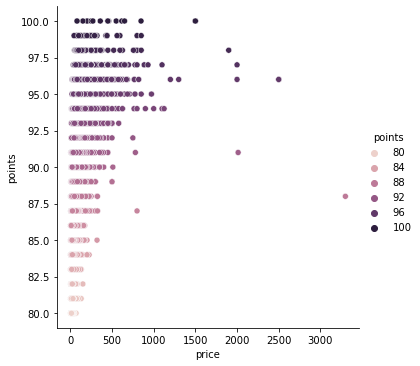

In [13]:
sns.relplot(
    data=new_df,
    hue="points",x="price", y="points",
)

In [14]:
p_df = df.copy()
province_count = df['province'].value_counts()
for index, value in province_count.items():
    if value/df['province'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")

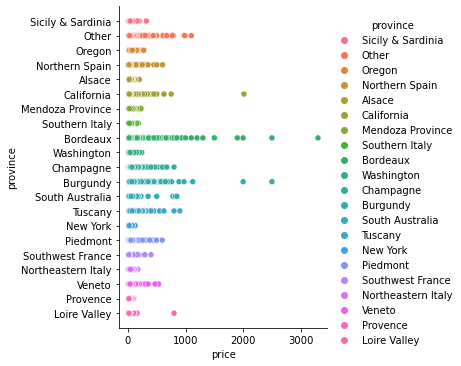

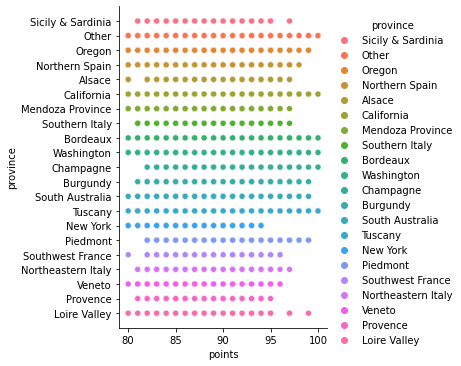

In [15]:
sns.relplot(
    data=p_df,
    hue="province",x="price", y="province",
)
sns.relplot(
    data=p_df,
    hue="province",x="points", y="province",
)

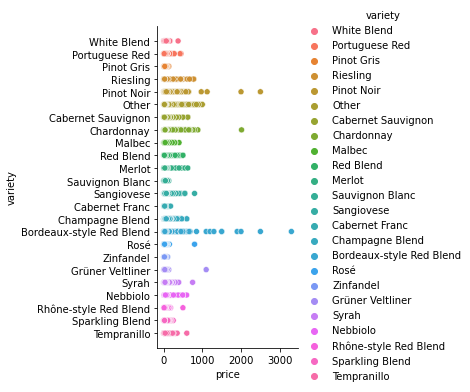

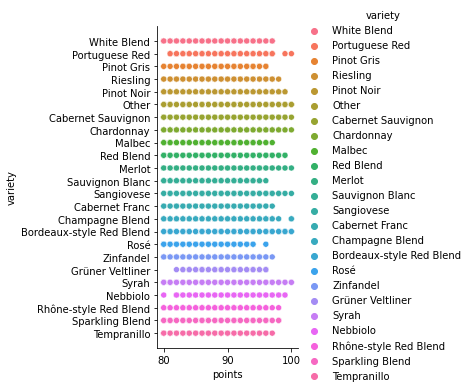

In [16]:
p_df = df.copy()
province_count = df['variety'].value_counts()
for index, value in province_count.items():
    if value/df['variety'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.relplot(
    data=p_df,
    hue="variety",x="price", y="variety",
)
sns.relplot(
    data=p_df,
    hue="variety",x="points", y="variety",
)

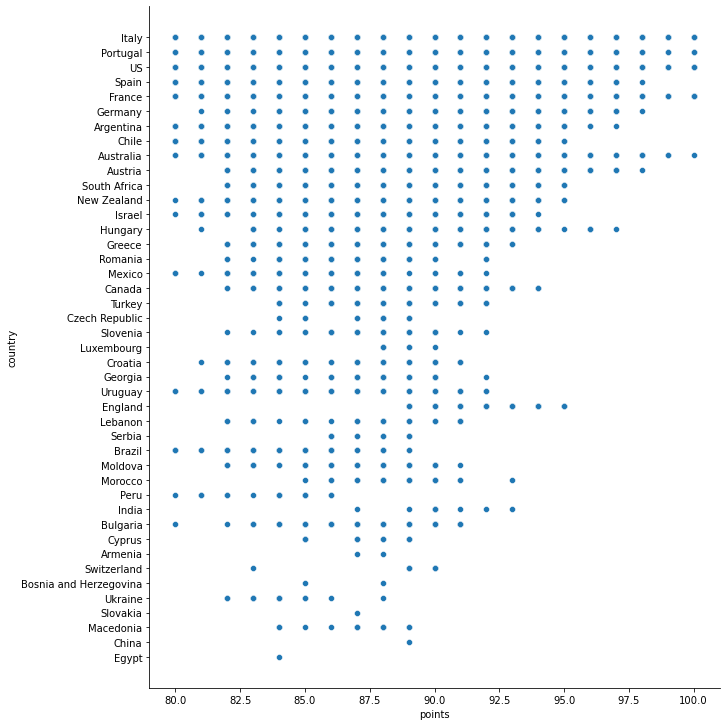

In [17]:
# Create a visualization
sns.relplot(
    x="points", y="country", data=df,
    height = 10
)

In [19]:
# #Create a visualization of points related to winery
# sns.relplot(
#     x="points", y="winery",data=df,
#     height = 10
# )
# p_df = df.copy()
# province_count = df['winery'].value_counts()
# for index, value in province_count.items():
#     if value/df['winery'].shape[0] < 0.01:
#         p_df = p_df.replace(index,"Other")
# sns.relplot(
#     data=p_df,
#     hue="winery",x="points", y="winery",
# )

In [ ]:
#Create a visualization of points related to province
sns.relplot(
    x="points", y="year",data=df,
    height = 30
)

In [ ]:
# Create a visualization
sns.relplot(
    x="points", y="designation", data=df,
    height = 30
)